In [1]:
import numpy as np
import pandas as pd
import re
import os
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import Parallel, delayed
import joblib
import multiprocessing

In [2]:
# Downloading NLTK resources
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amitn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
import pandas as pd

train_data = pd.read_csv('train.csv')  # Replace with your train dataset path


# Combine author and title into 'content' column
train_data['content'] = train_data['author'].fillna('') + ' ' + train_data['title'].fillna('')+' '+train_data['text'].fillna('')

# Check the first 5 rows of the dataframe
print(train_data.head())

# Checking for missing values
print(train_data.isnull().sum())

# Fill NaN values with empty string
train_data = train_data.fillna('')

# Combine author, title, and text into 'content' column
train_data['content'] = train_data['author'] + ' ' + train_data['title']+' '+train_data['text']


   id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  \
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1   
1  Ever get the feeling your life circles the rou...      0   
2  Why the Truth Might Get You Fired October 29, ...      1   
3  Videos 15 Civilians Killed In Single US Airstr...      1   
4  Print \nAn Iranian woman has been sentenced to...      1   

                                             content  
0  Darrell Lucus House Dem Aide: We Didn’t Even S...  
1  Daniel J. Flynn FLYNN: Hill

In [4]:
# Function for text preprocessing
def preprocess_text(content):
    port_stem = PorterStemmer()
    content = re.sub('[^a-zA-Z]', ' ', content)
    content = content.lower()
    content = content.split()
    content = [port_stem.stem(word) for word in content if not word in stopwords.words('english')]
    content = ' '.join(content)
    return content

In [7]:
# Applying text preprocessing
train_data['content'] = train_data['content'].apply(preprocess_text)

KeyboardInterrupt: 

In [11]:
# Separating data and labels
X = train_data['content'].values
Y = train_data['label'].values
# Converting textual data to numerical data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)
# Splitting the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [9]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Naive Bayes': MultinomialNB()
}

In [12]:
# Training and evaluating models
results = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, Y_train)
    
    # Predictions
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    
    # Accuracy
    train_accuracy = accuracy_score(Y_train, Y_train_pred)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)
    
    # Precision, Recall, F1-score
    precision = precision_score(Y_test, Y_test_pred)
    recall = recall_score(Y_test, Y_test_pred)
    f1 = f1_score(Y_test, Y_test_pred)
    
    # Confusion matrix
    cm = confusion_matrix(Y_test, Y_test_pred)
    
    # Store results
    results[model_name] = {
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': cm
    }

In [4]:
 # Confusion matrix
cm = confusion_matrix(Y_test, Y_test_pred)
    
results[model_name] = {
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': cm
    }

NameError: name 'Y_test' is not defined

In [16]:
# Displaying results
for model_name, result in results.items():
    print(model_name)
    for metric, score in result.items():
        print(f"{metric}: {score}")
    print("\n")

Logistic Regression
Train Accuracy: 0.9785456730769231
Test Accuracy: 0.9526442307692308
Precision: 0.9533653846153847
Recall: 0.9519923187710033
F1 Score: 0.9526783569541196
Confusion Matrix: [[1980   97]
 [ 100 1983]]


Random Forest
Train Accuracy: 1.0
Test Accuracy: 0.9283653846153846
Precision: 0.9583975346687211
Recall: 0.8958233317330773
F1 Score: 0.9260545905707196
Confusion Matrix: [[1996   81]
 [ 217 1866]]


SVM
Train Accuracy: 0.9986177884615385
Test Accuracy: 0.9663461538461539
Precision: 0.9663946231397024
Recall: 0.9663946231397024
F1 Score: 0.9663946231397024
Confusion Matrix: [[2007   70]
 [  70 2013]]


Naive Bayes
Train Accuracy: 0.9143629807692307
Test Accuracy: 0.880048076923077
Precision: 0.9858895705521472
Recall: 0.771483437349976
F1 Score: 0.8656073256127121
Confusion Matrix: [[2054   23]
 [ 476 1607]]




In [13]:
# Assuming you have already trained and saved your model and vectorizer
import joblib
# Save the model and vectorizer
joblib.dump(model, 'logistic_regression_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

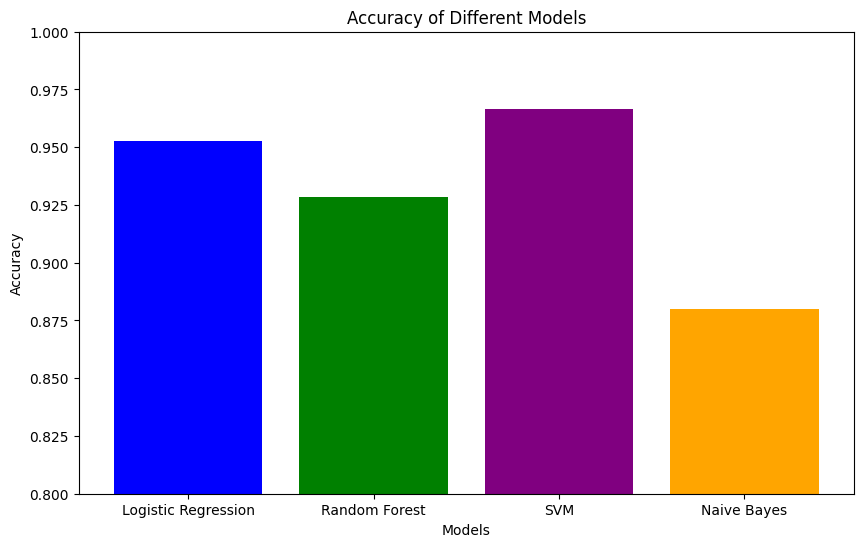

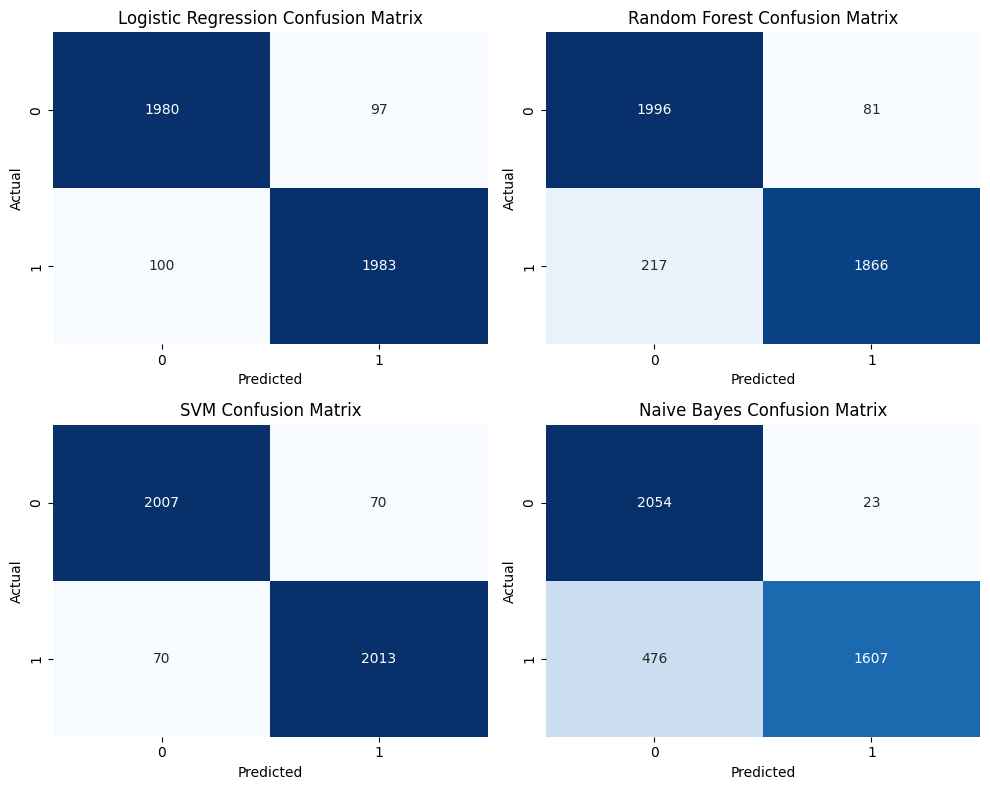

In [17]:
# Visualization
# Bar plot for accuracy
accuracy_scores = {model_name: result['Test Accuracy'] for model_name, result in results.items()}
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'green', 'purple', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0.8, 1.0)
plt.show()

# Confusion matrix heatmap
plt.figure(figsize=(10, 8))
for i, (model_name, result) in enumerate(results.items()):
    plt.subplot(2, 2, i+1)
    sns.heatmap(result['Confusion Matrix'], annot=True, cmap="Blues", fmt="d", cbar=False)
    plt.title(model_name + ' Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.tight_layout()
plt.show()


In [1]:
#visulizations
# Scatter plot for Precision vs Recall
plt.figure(figsize=(10, 6))
for model_name, result in results.items():
    plt.scatter(result['Precision'], result['Recall'], label=model_name)
    plt.text(result['Precision'], result['Recall'], model_name)

plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision vs Recall for Different Models')
plt.legend()
plt.show()
# Scatter plot for Precision vs Recall
plt.figure(figsize=(10, 6))
for model_name, result in results.items():
    plt.scatter(result['Precision'], result['Recall'], label=model_name)
    plt.text(result['Precision'], result['Recall'], model_name)

plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision vs Recall for Different Models')
plt.legend()
plt.show()


NameError: name 'plt' is not defined